<img align="right" src="../../additional_data/banner_siegel.png" style="width:1000px;">

# Plotting data

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Products used**: 
* **Prerequisites**:  Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_jupyter_introduction.ipynb)
    * The basic structure of the eo2cube [satellite datasets](02_eo2cube_introduction.ipynb)
    * How to [browse and load eo2cube data](03_data_lookup_and_loading.ipynb)
    * The basic structure of [xarray Dataset](04_xarrayI_data_structure.ipynb)
    * Application of built-in [xarray functions](05_xarrayII.ipynb)
    * Basic understandings of [matplotlib](https://matplotlib.org/)
    * How to use subplots(), to manipulate figure and axis objects in matplotlib ***(for readers who need further information, please check Further Readings.)***

## Description

This notebook introduces users plotting within the datacube environment. It aims to introduce useful options to visualize raster data in the eo2cube environment. Within this notebook, the following topics are covered:

* Plotting `True Color Composite` and `False Color Composite`
* Plotting `Histogram` to show frequency distributions
* Creating `2D-pseudocolor plot` to illustrate spatial variance
* Creating `Facet Plot` to visualize time series
* `Masking` scene

***

## Setting up
### Load packages

In [2]:
import datacube
from odc.ui import with_ui_cbk # processing bar for loading data
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt # matplotlib is a plotting for creating static, animated, and interactive visualizations
import pandas as pd
import seaborn as sns
%matplotlib inline 

In this script, we need to use two functions from a python script (.py) stored in this environment. 

To import the functions to the current script, we need a relative path to the file and import display_map, rgb (the name of the functions) from DEAPlotting (the name of the file). `sys.path.append()` is used to add a specific path to the python file. 

In [6]:
from dea_tools.plotting import display_map, rgb # this line allows us to use specific functions written in another script

### Load Data

In [3]:
dc = datacube.Datacube(app = '06_plotting')

In [5]:
data = dc.load(product= "s2_l2a",
             x = (24.78 ,24.88),
             y = (-28.90, -28.81),
             output_crs = "EPSG:32734",
             time = ("2020-10-01", "2020-12-31"),
             measurements= ["blue", "green", "red","nir", "swir_1", "SCL"],
             resolution = (-10,10),
             group_by = "solar_day",
             progress_cbk=with_ui_cbk())

Let's have a look at our data.

In [9]:
data

<xarray.Dataset>
Dimensions:      (time: 21, y: 1031, x: 1010)
Coordinates:
  * time         (time) datetime64[ns] 2020-10-01T08:28:17 ... 2020-12-30T08:...
  * y            (y) float64 6.807e+06 6.807e+06 ... 6.797e+06 6.797e+06
  * x            (x) float64 8.687e+05 8.687e+05 ... 8.787e+05 8.788e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 800 955 1188 1404 ... 2574 2502 2552 2722
    green        (time, y, x) uint16 856 1044 1222 1444 ... 2378 2508 2426 2432
    red          (time, y, x) uint16 927 1154 1326 1552 ... 2402 2332 2290 2348
    nir          (time, y, x) uint16 1128 1324 1572 1824 ... 3286 3348 3378 3398
    swir_1       (time, y, x) uint16 1394 1394 1829 1829 ... 3668 3549 3586 3586
    SCL          (time, y, x) uint8 7 7 7 7 7 7 8 8 7 7 ... 8 8 8 8 8 8 8 8 8 8
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

## **RGB Image**

To have the first view of our data, we can use the function `rgb()` defined in our written script DEAPlotting, stored in the folder "note_book". `rgb()` can plot different bands in the Data Variables in the red, blue, and green channels (in this order). If we input all three bands accordingly into the channels, it is called a **true color composite**. Otherwise, it is plotted as a **false color composite**.

However, we have to pay attention that the function can only plot in two dimensions (longitude and latitude). Hence, we can only input data array from a single time stamp. Here, we plot only the first time stamp (time = [0]), with col="time" argument, we define the collapse of a time dimension. We can look for the band name under Data Variables of the data set.

#### **1) True Color Composite**
With True color composite, we input all bands accordingly.

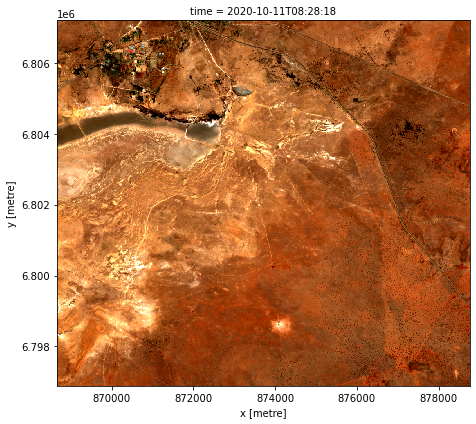

In [7]:
rgb(data.isel(time=[1]), bands=['red', 'green', 'blue'], col="time")

#### Alternative: short functions

In [9]:
def viz2d(ds,r,g,b):
    import cartopy.crs as ccrs
    da_rgb = ds.isel(time=0).to_array().rename({"variable": "band"}).sel(band=[r,g,b])
    ax = plt.subplot(projection=ccrs.UTM('33')) #set projection to pre-defined CRS; CRS can be checked using `aoi.crs`.
    plot = da_rgb.plot.imshow(ax=ax, rgb='band', transform=ccrs.UTM('33'), robust=True)
    return plot

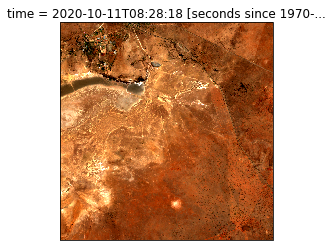

In [10]:
viz2d(data.isel(time=[1]),'red', 'green', 'blue')

#### **2) False Color Composite**
Here we visualize the Land/Water composite. Try out [different combinations](http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html) which fit different purposes.

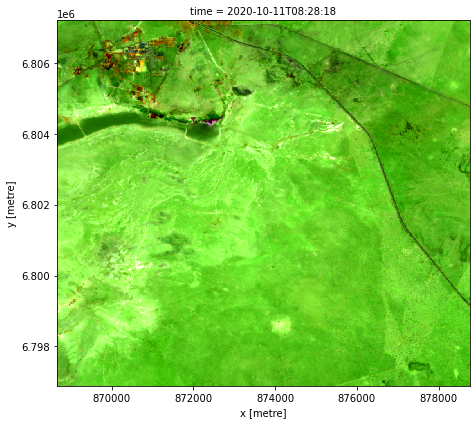

In [17]:
rgb(data.isel(time=[1]), bands=['nir', 'swir_1', 'red'], col="time")

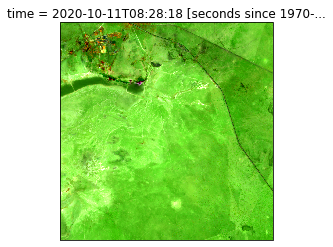

In [11]:
viz2d(data.isel(time=[1]),'nir', 'swir_1', 'red')

## **Histogram**
Besides, we can look at the distribution of pixel values by plotting a histogram (i.e., using plot() for a multi-temporal xarray dataset). We can see that most pixel reflectances lie between 400 and 1000.

(array([1.6754981e+07, 1.9229670e+06, 7.0357300e+05, 5.0288800e+05,
        3.8331500e+05, 7.7679700e+05, 6.5411300e+05, 1.2302500e+05,
        4.4241000e+04, 1.6100000e+03]),
 array([    0. ,  1753.6,  3507.2,  5260.8,  7014.4,  8768. , 10521.6,
        12275.2, 14028.8, 15782.4, 17536. ]),
 <BarContainer object of 10 artists>)

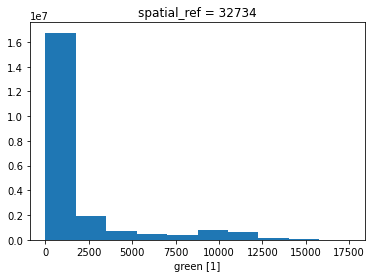

In [13]:
data.green.plot()
#data['coastal_aerosol'].plot(color='green')

## **Scatterplot**

Text(0.5, 1.0, 'Correlation of Red and Green bands')

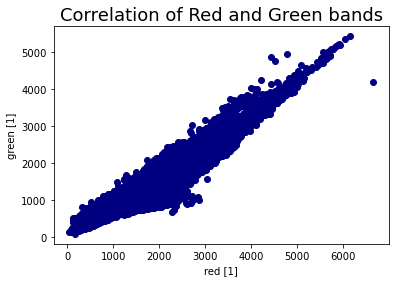

In [14]:
data[['red','green']].isel(time=1).plot.scatter(x='red',y='green', color='navy')
plt.title("Correlation of Red and Green bands", fontsize=18)

## **2D pcolormesh**
#### **1) Plotting Single Band**
We can also directly plot a single individual band using xarray functionality. It is important to note that it only takes a one-time stamp and one data variable by default. Here we plot the coastal aerosol band with the plot function. A specific [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) can be added with the cmap argument, and all the functionality of matplotlib is also available. The argument robust can be used to remove outliers.

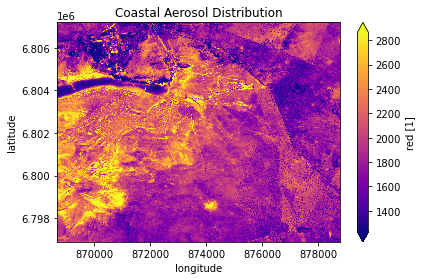

In [16]:
data.red.isel(time=[1]).plot(robust=True, cmap=plt.cm.plasma)

plt.title("Coastal Aerosol Distribution") #title
plt.ylabel("latitude") #labels
plt.xlabel("longitude")
plt.tight_layout() #remove excessive space in layout
plt.show() #show plot

Levels argument can be used to set a discrete scale instead of a continuous color scale. Note that seaborn colormap can only be used together with levels argument. We can see coastal aerosol is lower above the lake area.

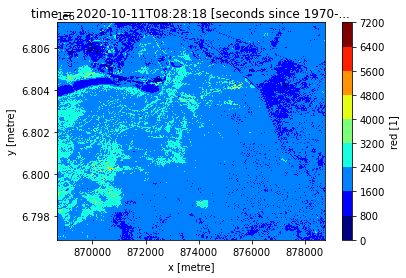

In [17]:
data.red.isel(time=[1]).plot(levels = 10, cmap="jet") #3/5 levels only
#data.coastal_aerosol.isel(time=[0]).plot(levels = 5, cmap="mako", robust=True)

#### **2) Facet Plot**
We can plot facet plot with the col="time" argument to show all time stamps. Note that plotting too many time stamps at once is not recommended.

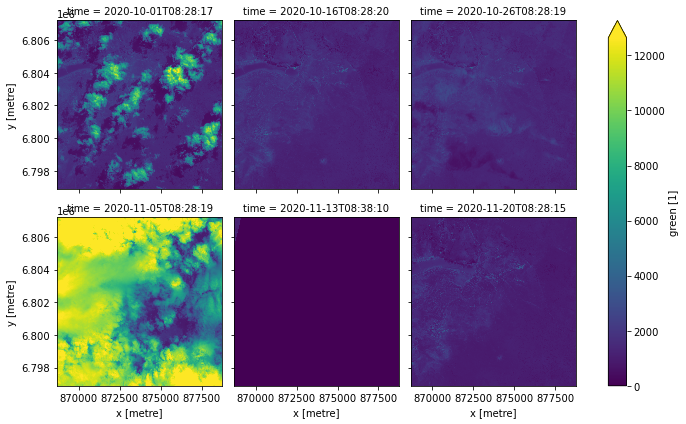

In [18]:
#data.isel(time=[0,2,4,6,8,10]).green.plot()
data.isel(time=[0,2,4,6,8,10]).green.plot(robust=True, col="time", col_wrap=3)

#### **3) Masking**
We can also mask out the area in the plot. The following code excludes the cloud area (scl = 9).

<img align="left" src="scl.png" style="width:250px;">

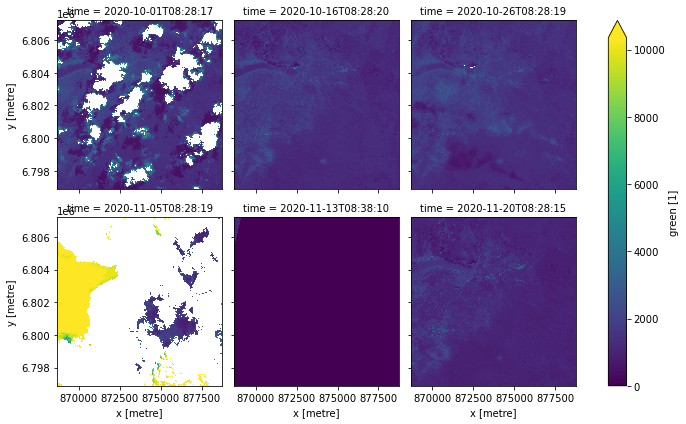

In [19]:
# Combining masking in facet plot
data.isel(time=[0,2,4,6,8,10]).green.where(data.SCL != 9).plot(robust=True, col="time", col_wrap=3)

#### **4) Average**
We can also do resampling (resample() + mean()) before plotting to get monthly average values. Here we get values for January and February, respectively.

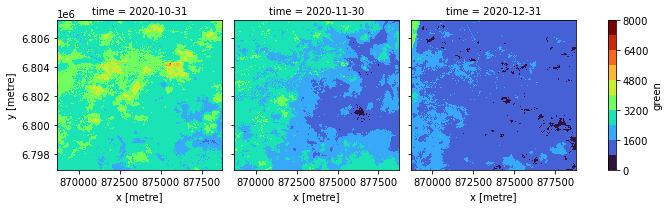

In [25]:
data.green.resample(time='1M').mean().plot(col="time", cmap="turbo", levels=10)

## **Time Series Linechart**
Xarray’s plotting capabilities are centered around DataArray objects, and its functionality is a thin wrapper around matplotlib. Hence, many Matplotlib functionalities, such as `plt.title()`, can be easily called. 

To produce a time series plot, we can reduce the dimensions of longitude and latitude with `mean(dim=["longitude","latitude"])` so that we get a single value of the whole area for every single time stamp. The resulting array can be used to plot a linechart with `matplotlib.pyplot`(plt) framework.

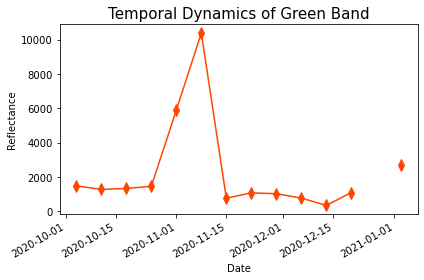

In [20]:
masked = data.green.where(data.SCL != 9)
week_data = masked.median(dim=["x","y"]).resample(time='1w').mean()
ts_plot = week_data.plot(color="orangered", marker="d", markersize=8) #dimension reduction
ts_plot

plt.title("Temporal Dynamics of Green Band", fontsize=15) #define title with matplotlib
plt.ylabel("Reflectance") #labels
plt.xlabel("Date")
plt.tight_layout() #remove excessive space in layout
plt.show() #display plot

Additional arguments can be passed directly to the matplotlib function. We can, for example, also plot histogram with the data array.

## **Using Pandas and Seaborn**
In the plotting basics, we have learned how to create graphics using xarray and pyplot. Yet, we can also utilize pandas and seaborn library with their more developed tools to improve the visuals of our plot. It requires more code but meanwhile gives more flexibility for plot customization.

In [25]:
#data.to_dataframe()

In [21]:
df2 = data[["green","swir_1"]].mean(dim=["x","y"]).to_dataframe() #convert to pandas
df2.head()

,green,swir_1,spatial_ref
time,,,
2020-10-01 08:28:17,2382.320532,4202.653894,32734
2020-10-11 08:28:18,1351.132833,3980.753510,32734
2020-10-16 08:28:20,1408.767104,4016.115918,32734
2020-10-21 08:28:18,1526.832155,3960.917611,32734
2020-10-26 08:28:19,1493.010056,4051.841372,32734


In [22]:
df2 = df2.drop(['spatial_ref'], axis=1) #delete unneeded columns
df2.head()

,green,swir_1
time,,
2020-10-01 08:28:17,2382.320532,4202.653894
2020-10-11 08:28:18,1351.132833,3980.753510
2020-10-16 08:28:20,1408.767104,4016.115918
2020-10-21 08:28:18,1526.832155,3960.917611
2020-10-26 08:28:19,1493.010056,4051.841372


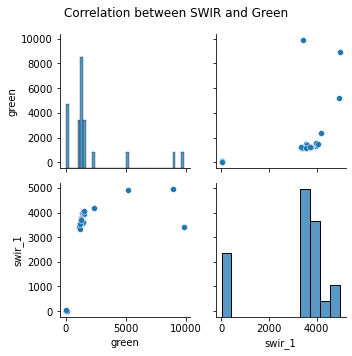

In [23]:
ax3 = sns.pairplot(df2[["green","swir_1"]]) #pairplot
plt.suptitle("Correlation between SWIR and Green") #main title
plt.tight_layout()
plt.show()

[Text(0, 0, 'Green'), Text(0, 1, 'SWIR 1')]

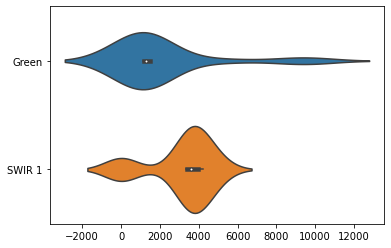

In [24]:
ax4 = sns.violinplot(data=df2, orient='h') #violin plot

ax4.set_yticks(range(2)) #needed to generate two y-tick labels
ax4.set_yticklabels(['Green','SWIR 1']) #List of y-tick labels

## Recommended next steps

To continue with the beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_jupyter_introduction.ipynb)
2. [eo2cube](02_eo2cube.ipynb)
3. [Products and Measurements](03_products_and_measurements.ipynb)
4. [Loading data](04_loading_data.ipynb)
5. [Advanced xarrays operations](05_advanced_xarray.ipynb)
6. **Plotting data (this notebook)**
7. [Basic analysis of remote sensing data](07_basic_analysis.ipynb)
8. [Parallel processing with Dask](08_parallel_processing_with_dask.ipynb)

***

## Further Reading
For users who are not familar with basics functionality and plottings of matplotlib, please check on the following external tutorial to learn about:

1) [Short Introduction of Matplotlib](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)

*  Plotting options and parameters of Matplotlib

2) [Introduction to Plotting in Python Using Matplotlib](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/).

*  Introduction to pyplot module
*  Customize Plots Using Matplotlib (Tick, Label, Title, Marker, Color, etc.)

3) Working With Datetime Objects in Python

*  [Introduction to Datetime Object](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/)
*  [Customize Matplotlibe Dates Ticks on the x-axis in Python](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/plot-time-series-data-in-python/)

<br>
To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. [Loading Data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/03_data_lookup_and_loading.ipynb)
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. [Xarray II: Index and Statistics](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/05_xarrayII.ipynb)
6. ***Plotting data (this notebook)***
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. [Image Processing basics using NumPy and Matplotlib](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/II_numpy_image_processing.ipynb)
3. [Vector Processing](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/III_process_vector_data.ipynb)
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** May 2022